<a href="https://colab.research.google.com/github/eugeniaring/machine-learning-course-eugenia/blob/main/7_dim_reduction_ifoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [10]:
X = df.drop(['class'],axis=1)

In [11]:
y = df['class']

In [17]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [12]:
len(X)

8124

In [14]:
for c in X.columns:
   print(X[c].value_counts())
   print('\n')

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


f    4748
t    3376
Name: bruises, dtype: int64


n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


f    7914
a     210
Name: gill-attachment, dtype: int64


c    6812
w    1312
Name: gill-spacing, dtype: int64


b    5612
n    2512
Name: gill-size, dtype: int64


b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64


t    4608
e    3516
Name: stalk-shape, dtype: int64


b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: i

In [15]:
X = pd.get_dummies(X,prefix_sep='_')

In [16]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [20]:
y = LabelEncoder().fit_transform(y)

In [21]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [25]:
len(X_train)

5686

In [26]:
len(X_test)

2438

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
y_pred_train = rf.predict(X_train)

In [30]:
y_pred_test = rf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
len(y_test[y_test==1])

1167

In [40]:
print(confusion_matrix(y_train,y_pred_train))

[[2937    0]
 [   0 2749]]


In [34]:
print(confusion_matrix(y_test,y_pred_test))

[[1271    0]
 [   0 1167]]


In [35]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1271
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Analisi delle componenti principali

In [41]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=3)

In [77]:
X_pca = pca.fit_transform(X)

In [78]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [79]:
X_pca

array([[-0.99624533, -0.94689151,  0.80250285],
       [-1.4417328 , -0.16415416,  1.06817312],
       [-1.52408473, -0.40874607,  0.85316801],
       ...,
       [-0.28781675, -0.32621372,  0.2746662 ],
       [ 1.93043313, -1.57316301, -0.11576061],
       [-0.24929724, -0.31229209,  0.36187111]])

In [80]:
pca.explained_variance_ratio_

array([0.16810879, 0.13889755, 0.09744943])

In [82]:
pca_df = pd.DataFrame(data = X_pca,columns=['PC1','PC2','PC3'])
pca_df

,PC1,PC2,PC3
0,-0.996245,-0.946892,0.802503
1,-1.441733,-0.164154,1.068173
2,-1.524085,-0.408746,0.853168
3,-1.151800,-0.675820,0.629851
4,-0.617503,-0.996143,1.725888
...,...,...,...
8119,-0.126657,-0.410460,0.340034
8120,-0.071756,-0.367338,0.137012
8121,-0.287817,-0.326214,0.274666
8122,1.930433,-1.573163,-0.115761


In [83]:
pca_df['class'] = df['class'].copy()

In [84]:
pca_df

,PC1,PC2,PC3,class
0,-0.996245,-0.946892,0.802503,p
1,-1.441733,-0.164154,1.068173,e
2,-1.524085,-0.408746,0.853168,e
3,-1.151800,-0.675820,0.629851,p
4,-0.617503,-0.996143,1.725888,e
...,...,...,...,...
8119,-0.126657,-0.410460,0.340034,e
8120,-0.071756,-0.367338,0.137012,e
8121,-0.287817,-0.326214,0.274666,e
8122,1.930433,-1.573163,-0.115761,p


In [85]:
import matplotlib.pyplot as plt

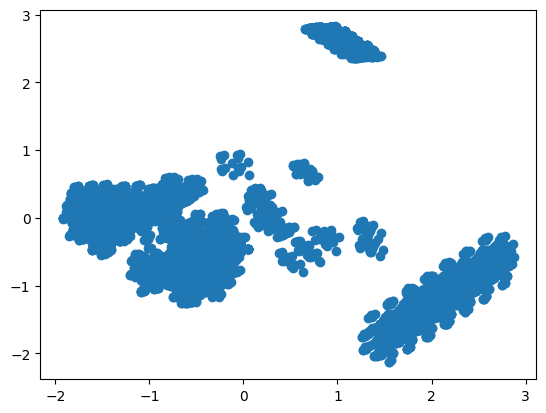

In [86]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.show()

In [87]:
pca_df.loc[pca_df['class']=='p','PC1']

0      -0.996245
3      -1.151800
8      -0.905198
13     -0.859385
17     -1.083524
          ...   
8114    0.640749
8116    2.124983
8117    2.027813
8118    2.063272
8122    1.930433
Name: PC1, Length: 3916, dtype: float64

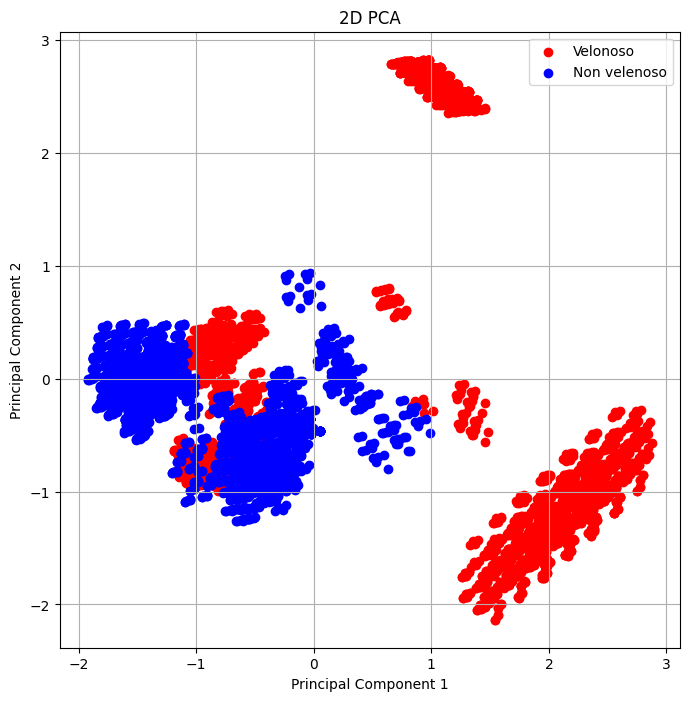

In [88]:
plt.figure(figsize=(8,8))

classes = ['p','e']
colors = ['r','b']

for clas, color in zip(classes,colors):
    plt.scatter( pca_df.loc[pca_df['class']==clas,'PC1'],  pca_df.loc[pca_df['class'] == clas,'PC2'], c=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.legend(['Velonoso','Non velenoso'])
plt.grid()
plt.show()

In [75]:
from mpl_toolkits.mplot3d import Axes3D

In [91]:
pca_df['class_num'] = y

In [92]:
pca_df

,PC1,PC2,PC3,class,class_num
0,-0.996245,-0.946892,0.802503,p,1
1,-1.441733,-0.164154,1.068173,e,0
2,-1.524085,-0.408746,0.853168,e,0
3,-1.151800,-0.675820,0.629851,p,1
4,-0.617503,-0.996143,1.725888,e,0
...,...,...,...,...,...
8119,-0.126657,-0.410460,0.340034,e,0
8120,-0.071756,-0.367338,0.137012,e,0
8121,-0.287817,-0.326214,0.274666,e,0
8122,1.930433,-1.573163,-0.115761,p,1


In [93]:
fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2
classes = ['p','e']
colors = ['r','b']

ax.scatter(pca_df['PC1'],  pca_df['PC2'], pca_df['PC3'] , c=pca_df['class_num'] , marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<Figure size 800x800 with 0 Axes>

In [105]:
fig = px.scatter(X_pca,x=0,y=1,color=df['class'],labels={'0':'PC1','1':'PC2'})
fig.show()

In [106]:
fig = px.scatter_3d(X_pca,x=0,y=1,z=2,color=df['class'],labels={'0':'PC1','1':'PC2','2':'PC3'})
fig.show()

In [107]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [108]:
fig = px.scatter_3d(X_pca,x=0,y=1,z=2,color=df['cap-shape'],labels={'0':'PC1','1':'PC2','2':'PC3'})
fig.show()

## t-sne

In [94]:
from sklearn.manifold import TSNE

In [109]:
tsne = TSNE(n_components = 3, perplexity = 40, n_iter=300)

In [110]:
X_tsne = tsne.fit_transform(X)

In [97]:
X_tsne

array([[-4.3292847 , -5.048336  ,  1.9135001 ],
       [-6.173559  , -0.07414031,  3.4288578 ],
       [-4.918063  , -2.3950725 ,  3.1640396 ],
       ...,
       [-1.0646883 , -1.9658053 ,  0.21868771],
       [ 3.2908742 ,  0.3144197 , -0.46341136],
       [-1.0646076 , -1.9658421 ,  0.21868783]], dtype=float32)

In [98]:
tsne_df = pd.DataFrame(data = X_tsne,columns=['tsne1','tsne2','tsne3'])
tsne_df

,tsne1,tsne2,tsne3
0,-4.329285,-5.048336,1.913500
1,-6.173559,-0.074140,3.428858
2,-4.918063,-2.395072,3.164040
3,-3.217116,-4.622283,0.231107
4,-0.097666,-4.097326,5.880537
...,...,...,...
8119,-1.064588,-1.965827,0.218689
8120,-1.064586,-1.960648,0.218785
8121,-1.064688,-1.965805,0.218688
8122,3.290874,0.314420,-0.463411


In [99]:
tsne_df['class'] = df['class'].copy()

In [100]:
import plotly.express as px

In [103]:
fig = px.scatter(X_tsne,x=0,y=1,color=df['class'],labels={'0':'t-sne 1','1':'t-sne 2'})
fig.show()

In [104]:
fig = px.scatter_3d(X_tsne,x=0,y=1,z=2,color=df['class'],labels={'0':'t-sne 1','1':'t-sne 2','2':'t-sne 3'})
fig.show()

In [ ]:
plt.figure(figsize=(8,8))

classes = ['p','e']
colors = ['r','b']

for clas, color in zip(classes,colors):
    plt.scatter( pca_df.loc[pca_df['class']==clas,'tsne1'],  pca_df.loc[pca_df['class'] == clas,'tsne2'], c=color)

plt.xlabel('t-sne 1')
plt.ylabel('t-sne 2')
plt.title('2D PCA')
plt.legend(['Velonoso','Non velenoso'])
plt.grid()
plt.show()